# Project Title: Exploring the neighborhood: Toronto vs New York
***

## Problem Statement:
### This work explains how the neighborhood of Toronto is different, or similar to that of New York City. We will get to see the most common venues for both.

## Project Background: 

Toronto and New York being the financial capital of Canada and US respectively are one of the densely populated cities in the world. Both these cities see a lot of diversity resulting from movement of lot of immigrants from several parts of world for work and settlement. These are one of the most immigrant-friendly cities, still different in so many aspects, which we are going to observe in this work.

The purpose of this whole exercise is for submission of final capstone project for **"IBM Data Science"** course on coursera as well as to showcase my data science skills in the real world application.

## Data and Resources to be used
1. List of postal codes of Canada Wiki: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M for an access to neighborhood data of Toronto region.
2. List of postal codes of New York Wiki https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoods.htm for an access to neighborhood data of New york region.
3. Geographical coordinates of the neighborhoods: http://cocl.us/Geospatial_data for getting the longitude and latitude data for the negihborhoods.
4. Foursquare database: https://Foursquare.com to be used in order to explore the desired neighborhood data for various restaurants details and access the Json files. This data shall be utilized to map the indian restaurants in various locations.

## Problem solving strategy

The idea is to compare Toronto and New York region for their similarities difference in terms of the most common venues they house. I will specifically compare the number of Indian, Chinese and American Restaurants in both cities as well as list down the 10 most common venues in both cities Neighborhood wise. The outcome of this study will help tourists and new immigrants have an overview of the common venues in both cities and chalk out the differences between both, which might further help them in their decision of travel or immigration choice.
### Step-wise approach of problem solving:

**Step-1:** Web scraping of the neighborhood data from postal codes of Canada Wiki-link. Clean the data by removing the missing values and store the data in a python Dataframe consisting of three columns namely: PostalCode, Borough, and Neighborhood

**Step-2:** Web scraping of the neighborhood data from postal codes of New York Wiki-link. Clean the data by removing the missing values and store the data in a python Dataframe consisting of three columns namely: PostalCode, Borough, and Neighborhood

**Step-3:** Take the help of long-lat data from the geospatial data wikilink and append the geographical coordinates in the above dataframes to get new respective dataframes for further analysis.

**Step-4:** Getting location data using Foursquare API. It will be used to retrieve information of the common venues in Toronto and New York neighborhoods. The API will return a JSON file which will be further converted into a Python Dataframe.

**Step-5: Exploratory Data Analysis**

- Plot the prepared location data on the map for visualization purpose.
- Plot and find the relationship between Neighborhoods and Various Restaurants for both cities.
- List down 10 most common venues for both cities.


**Step-6:** Lastly we will discuss the results based on above findings and provide a snapshot of both cities which will help travelleres and immigrants in making their choice.
***

# The Real Code

### 1. Webscraping, cleaning and initial analysis of neighborhood data from Wikipedia link

In [1]:
# Dowloading the dependencies that we need 

import numpy as np # library to handle data in vector form
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library
from bs4 import BeautifulSoup
import lxml
print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/rohan/opt/anaconda3

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.3                |   py37hc8dfbb8_1         3.0 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    python_abi-3.7             |          1_cp37m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geogra

/Users/rohan/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /Users/rohan/opt/anaconda3

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    certifi-2019.11.28         |           py37_0         148 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         861 KB

The following NEW packages will be INSTALLED:

  altair             conda-forge/noarch::altair-4.1.0-py_1

In [569]:
# Data download, scraping and wrangling

List_url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
source = requests.get(List_url).text
soup = BeautifulSoup(source, 'xml')
table=soup.find('table')


In [570]:
#dataframe with columns: PostalCode, Borough, and Neighborhood
column_names = ['Postalcode','Borough','Neighborhood']
df = pd.DataFrame(columns = column_names)

In [571]:
# Search all the postcode, borough, neighborhood 
for tr_cell in table.find_all('tr'):
    row_data=[]
    for td_cell in tr_cell.find_all('td'):
        row_data.append(td_cell.text.strip())
    if len(row_data)==3:
        df.loc[len(df)] = row_data

In [572]:
df.head(10)

Postalcode           Borough                                  Neighborhood
0        M1A      Not assigned                                              
1        M2A      Not assigned                                              
2        M3A        North York                                     Parkwoods
3        M4A        North York                              Victoria Village
4        M5A  Downtown Toronto                    Regent Park / Harbourfront
5        M6A        North York             Lawrence Manor / Lawrence Heights
6        M7A  Downtown Toronto  Queen's Park / Ontario Provincial Government
7        M8A      Not assigned                                              
8        M9A         Etobicoke                              Islington Avenue
9        M1B       Scarborough                               Malvern / Rouge

In [573]:
# removing all the not assigned values in Borough column
df=df[df['Borough']!='Not assigned']
df.head(10)

Postalcode           Borough                                  Neighborhood
2         M3A        North York                                     Parkwoods
3         M4A        North York                              Victoria Village
4         M5A  Downtown Toronto                    Regent Park / Harbourfront
5         M6A        North York             Lawrence Manor / Lawrence Heights
6         M7A  Downtown Toronto  Queen's Park / Ontario Provincial Government
8         M9A         Etobicoke                              Islington Avenue
9         M1B       Scarborough                               Malvern / Rouge
11        M3B        North York                                     Don Mills
12        M4B         East York              Parkview Hill / Woodbine Gardens
13        M5B  Downtown Toronto                      Garden District, Ryerson

In [574]:
#taking care of the duplicate values

temp_df=df.groupby('Postalcode')['Neighborhood'].apply(lambda x: "%s" % ', '.join(x))
temp_df=temp_df.reset_index(drop=False)
temp_df.rename(columns={'Neighborhood':'Neighborhood_joined'},inplace=True)

df_merge = pd.merge(df, temp_df, on='Postalcode')
df_merge.drop(['Neighborhood'],axis=1,inplace=True)
df_merge.drop_duplicates(inplace=True)
df_merge.rename(columns={'Neighborhood_joined':'Neighborhood'},inplace=True)
df_merge.head(10)

Postalcode           Borough                                  Neighborhood
0        M3A        North York                                     Parkwoods
1        M4A        North York                              Victoria Village
2        M5A  Downtown Toronto                    Regent Park / Harbourfront
3        M6A        North York             Lawrence Manor / Lawrence Heights
4        M7A  Downtown Toronto  Queen's Park / Ontario Provincial Government
5        M9A         Etobicoke                              Islington Avenue
6        M1B       Scarborough                               Malvern / Rouge
7        M3B        North York                                     Don Mills
8        M4B         East York              Parkview Hill / Woodbine Gardens
9        M5B  Downtown Toronto                      Garden District, Ryerson

### Adding geographical coordinates to the above dataframe for making it ready for further analysis of common venues

In [575]:
#add Geo-spatial data
dfll= pd.read_csv("http://cocl.us/Geospatial_data")
dfll.head()

Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476

In [581]:
dfll.rename(columns={'Postal Code':'Postalcode'}, inplace=True)
dfll.set_index("Postalcode")

Latitude  Longitude
Postalcode                      
M1B         43.806686 -79.194353
M1C         43.784535 -79.160497
M1E         43.763573 -79.188711
M1G         43.770992 -79.216917
M1H         43.773136 -79.239476
M1J         43.744734 -79.239476
M1K         43.727929 -79.262029
M1L         43.711112 -79.284577
M1M         43.716316 -79.239476
M1N         43.692657 -79.264848
M1P         43.757410 -79.273304
M1R         43.750072 -79.295849
M1S         43.794200 -79.262029
M1T         43.781638 -79.304302
M1V         43.815252 -79.284577
M1W         43.799525 -79.318389
M1X         43.836125 -79.205636
M2H         43.803762 -79.363452
M2J         43.778517 -79.346556
M2K         43.786947 -79.385975
M2L         43.757490 -79.374714
M2M         43.789053 -79.408493
M2N         43.770120 -79.408493
M2P         43.752758 -79.400049
M2R         43.782736 -79.442259
M3A         43.753259 -79.329656
M3B         43.745906 -79.352188
M3C         43.725900 -79.340923
M3H         43.754328 -79.442259
M3J         43.767980 -79.487262
M3K         43.737473 -79.464763
M3L         43.739015 -79.506944
M3M         43.728496 -79.495697
M3N         43.761631 -79.520999
M4A         43.725882 -79.315572
M4B         43.706397 -79.309937
M4C         43.695344 -79.318389
M4E         43.676357 -79.293031
M4G         43.709060 -79.363452
M4H         43.705369 -79.349372
M4J         43.685347 -79.338106
M4K         43.679557 -79.352188
M4L         43.668999 -79.315572
M4M         43.659526 -79.340923
M4N         43.728020 -79.388790
M4P         43.712751 -79.390197
M4R         43.715383 -79.405678
M4S         43.704324 -79.388790
M4T         43.689574 -79.383160
M4V         43.686412 -79.400049
M4W         43.679563 -79.377529
M4X         43.667967 -79.367675
M4Y         43.665860 -79.383160
M5A         43.654260 -79.360636
M5B         43.657162 -79.378937
M5C         43.651494 -79.375418
M5E         43.644771 -79.373306
M5G         43.657952 -79.387383
M5H         43.650571 -79.384568
M5J         43.640816 -79.381752
M5K         43.647177 -79.381576
M5L         43.648198 -79.379817
M5M         43.733283 -79.419750
M5N         43.711695 -79.416936
M5P         43.696948 -79.411307
M5R         43.672710 -79.405678
M5S         43.662696 -79.400049
M5T         43.653206 -79.400049
M5V         43.628947 -79.394420
M5W         43.646435 -79.374846
M5X         43.648429 -79.382280
M6A         43.718518 -79.464763
M6B         43.709577 -79.445073
M6C         43.693781 -79.428191
M6E         43.689026 -79.453512
M6G         43.669542 -79.422564
M6H         43.669005 -79.442259
M6J         43.647927 -79.419750
M6K         43.636847 -79.428191
M6L         43.713756 -79.490074
M6M         43.691116 -79.476013
M6N         43.673185 -79.487262
M6P         43.661608 -79.464763
M6R         43.648960 -79.456325
M6S         43.651571 -79.484450
M7A         43.662301 -79.389494
M7R         43.636966 -79.615819
M7Y         43.662744 -79.321558
M8V         43.605647 -79.501321
M8W         43.602414 -79.543484
M8X         43.653654 -79.506944
M8Y         43.636258 -79.498509
M8Z         43.628841 -79.520999
M9A         43.667856 -79.532242
M9B         43.650943 -79.554724
M9C         43.643515 -79.577201
M9L         43.756303 -79.565963
M9M         43.724766 -79.532242
M9N         43.706876 -79.518188
M9P         43.696319 -79.532242
M9R         43.688905 -79.554724
M9V         43.739416 -79.588437
M9W         43.706748 -79.594054

In [578]:
df.set_index("Postalcode")

Borough  \
Postalcode                     
M3A               North York   
M4A               North York   
M5A         Downtown Toronto   
M6A               North York   
M7A         Downtown Toronto   
M9A                Etobicoke   
M1B              Scarborough   
M3B               North York   
M4B                East York   
M5B         Downtown Toronto   
M6B               North York   
M9B                Etobicoke   
M1C              Scarborough   
M3C               North York   
M4C                East York   
M5C         Downtown Toronto   
M6C                     York   
M9C                Etobicoke   
M1E              Scarborough   
M4E             East Toronto   
M5E         Downtown Toronto   
M6E                     York   
M1G              Scarborough   
M4G                East York   
M5G         Downtown Toronto   
M6G         Downtown Toronto   
M1H              Scarborough   
M2H               North York   
M3H               North York   
M4H                East York   
M5H         Downtown Toronto   
M6H             West Toronto   
M1J              Scarborough   
M2J               North York   
M3J               North York   
M4J                East York   
M5J         Downtown Toronto   
M6J             West Toronto   
M1K              Scarborough   
M2K               North York   
M3K               North York   
M4K             East Toronto   
M5K         Downtown Toronto   
M6K             West Toronto   
M1L              Scarborough   
M2L               North York   
M3L               North York   
M4L             East Toronto   
M5L         Downtown Toronto   
M6L               North York   
M9L               North York   
M1M              Scarborough   
M2M               North York   
M3M               North York   
M4M             East Toronto   
M5M               North York   
M6M                     York   
M9M               North York   
M1N              Scarborough   
M2N               North York   
M3N               North York   
M4N          Central Toronto   
M5N          Central Toronto   
M6N                     York   
M9N                     York   
M1P              Scarborough   
M2P               North York   
M4P          Central Toronto   
M5P          Central Toronto   
M6P             West Toronto   
M9P                Etobicoke   
M1R              Scarborough   
M2R               North York   
M4R          Central Toronto   
M5R          Central Toronto   
M6R             West Toronto   
M7R              Mississauga   
M9R                Etobicoke   
M1S              Scarborough   
M4S          Central Toronto   
M5S         Downtown Toronto   
M6S             West Toronto   
M1T              Scarborough   
M4T          Central Toronto   
M5T         Downtown Toronto   
M1V              Scarborough   
M4V          Central Toronto   
M5V         Downtown Toronto   
M8V                Etobicoke   
M9V                Etobicoke   
M1W              Scarborough   
M4W         Downtown Toronto   
M5W         Downtown Toronto   
M8W                Etobicoke   
M9W                Etobicoke   
M1X              Scarborough   
M4X         Downtown Toronto   
M5X         Downtown Toronto   
M8X                Etobicoke   
M4Y         Downtown Toronto   
M7Y             East Toronto   
M8Y                Etobicoke   
M8Z                Etobicoke   

                                                 Neighborhood  
Postalcode                                                     
M3A                                                 Parkwoods  
M4A                                          Victoria Village  
M5A                                Regent Park / Harbourfront  
M6A                         Lawrence Manor / Lawrence Heights  
M7A              Queen's Park / Ontario Provincial Government  
M9A                                          Islington Avenue  
M1B                                           Malvern / Rouge  
M3B                                                 Don Mills  
M4B                 

In [582]:
toronto_data=pd.merge(df, dfll)
toronto_data.head()

Postalcode           Borough                                  Neighborhood  \
0        M3A        North York                                     Parkwoods   
1        M4A        North York                              Victoria Village   
2        M5A  Downtown Toronto                    Regent Park / Harbourfront   
3        M6A        North York             Lawrence Manor / Lawrence Heights   
4        M7A  Downtown Toronto  Queen's Park / Ontario Provincial Government   

    Latitude  Longitude  
0  43.753259 -79.329656  
1  43.725882 -79.315572  
2  43.654260 -79.360636  
3  43.718518 -79.464763  
4  43.662301 -79.389494

In [585]:
toronto_data.shape

(103, 5)

In [445]:
#In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent to_explorer, as shown below
address = 'Toronto, ON, Canada'
geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto, ON, Canada are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto, ON, Canada are 43.6534817, -79.3839347.


In [662]:
# create map of Toronto Neighborhood we are working upon using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Borough'], toronto_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

Here we can visualize the locations we will explore further in this work.

### Now we will utilize the Foursquare API to explore the neighborhood

In [14]:
#Define Foursquare credentials and version
CLIENT_ID = 'FG4ZQINCPVMRGMDEFT0OQVQCIMGOID4BJL0ZKYKTDX5AP11E' # your Foursquare ID
CLIENT_SECRET = 'EVCT0GY05ZFUB4SZ2IY1H3FD2SAAHPBPQRAMLEOAWG5A4IUI' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FG4ZQINCPVMRGMDEFT0OQVQCIMGOID4BJL0ZKYKTDX5AP11E
CLIENT_SECRET:EVCT0GY05ZFUB4SZ2IY1H3FD2SAAHPBPQRAMLEOAWG5A4IUI


In [20]:
#Explore Neighborhoods in Toronto
toronto_data.loc[0, 'Neighborhood']

'Parkwoods'

In [21]:
neighborhood_latitude = toronto_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = toronto_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = toronto_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Parkwoods are 43.7532586, -79.3296565.


***Now, let's get the top 100 venues that are in Marble Hill within a radius of 500 meters.***

In [22]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=FG4ZQINCPVMRGMDEFT0OQVQCIMGOID4BJL0ZKYKTDX5AP11E&client_secret=EVCT0GY05ZFUB4SZ2IY1H3FD2SAAHPBPQRAMLEOAWG5A4IUI&v=20180605&ll=43.7532586,-79.3296565&radius=500&limit=100'

In [87]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venuesList=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venuesList.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearbyVenues = pd.DataFrame([item for venue_list in venuesList for item in venue_list])
    nearbyVenues.columns = ['Neighhborhood', 
                  'Neighhborhood Latitude', 
                  'Neighhborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearbyVenues)

def getTorontoCoords():
    geolocator = Nominatim()
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return location, latitude, longitude

torontoVenues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )


ToroData = toronto_data.reset_index()


Parkwoods
Victoria Village
Regent Park / Harbourfront
Lawrence Manor / Lawrence Heights
Queen's Park / Ontario Provincial Government
Islington Avenue
Malvern / Rouge
Don Mills
Parkview Hill / Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park / Princess Gardens / Martin Grove / Islington / Cloverdale
Rouge Hill / Port Union / Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate / Bloordale Gardens / Old Burnhamthorpe / Markland Wood
Guildwood / Morningside / West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor / Wilson Heights / Downsview North
Thorncliffe Park
Richmond / Adelaide / King
Dufferin / Dovercourt Village
Scarborough Village
Fairview / Henry Farm / Oriole
Northwood Park / York University
East Toronto
Harbourfront East / Union Station / Toronto Islands
Little Portugal / Trinity
Kennedy Park / Ionview / East Birchmount Park
Bayview Village
Do

In [133]:
torontoVenues.head()

Neighhborhood  Neighhborhood Latitude  Neighhborhood Longitude  \
0         Parkwoods               43.753259               -79.329656   
1         Parkwoods               43.753259               -79.329656   
2         Parkwoods               43.753259               -79.329656   
3  Victoria Village               43.725882               -79.315572   
4  Victoria Village               43.725882               -79.315572   

                               Venue  Venue Latitude  Venue Longitude  \
0                    Brookbanks Park       43.751976       -79.332140   
1                      Variety Store       43.751974       -79.333114   
2  Corrosion Service Company Limited       43.752432       -79.334661   
3             Victoria Village Arena       43.723481       -79.315635   
4                        Tim Hortons       43.725517       -79.313103   

               Venue Category  
0                        Park  
1           Food & Drink Shop  
2  Construction & Landscaping  
3                Hockey Arena  
4                 Coffee Shop

In [91]:
torontoVenues.shape

(2128, 7)

In [830]:
#Now Let's check how many venues were returned for each neighborhood
torontoVenues.groupby('Neighhborhood').count()

Neighhborhood Latitude  \
Neighhborhood                                                                
Agincourt                                                                5   
Alderwood / Long Branch                                                 10   
Bathurst Manor / Wilson Heights / Downsview North                       20   
Bayview Village                                                          4   
Bedford Park / Lawrence Manor East                                      25   
Berczy Park                                                             57   
Birch Cliff / Cliffside West                                             4   
Brockton / Parkdale Village / Exhibition Place                          22   
Business reply mail Processing CentrE                                   18   
CN Tower / King and Spadina / Railway Lands / H...                      18   
Caledonia-Fairbanks                                                      4   
Canada Post Gateway Processing Centre                                   12   
Cedarbrae                                                                8   
Central Bay Street                                                      63   
Christie                                                                18   
Church and Wellesley                                                    72   
Clarks Corners / Tam O'Shanter / Sullivan                               15   
Cliffside / Cliffcrest / Scarborough Village West                        2   
Commerce Court / Victoria Hotel                                        100   
Davisville                                                              33   
Davisville North                                                         6   
Del Ray / Mount Dennis / Keelsdale and Silverthorn                       4   
Don Mills                                                               28   
Dorset Park / Wexford Heights / Scarborough Tow...                       5   
Downsview                                                               17   
Dufferin / Dovercourt Village                                           16   
East Toronto                                                             3   
Eringate / Bloordale Gardens / Old Burnhamthorp...                       8   
Fairview / Henry Farm / Oriole                                          60   
First Canadian Place / Underground city                                100   
Forest Hill North & West                                                 5   
Garden District, Ryerson                                               100   
Glencairn                                                                4   
Golden Mile / Clairlea / Oakridge                                        9   
Guildwood / Morningside / West Hill                                      7   
Harbourfront East / Union Station / Toronto Isl...                     100   
High Park / The Junction South                                          22   
Hillcrest Village                                                        4   
Humber Summit                                                            2   
Humberlea / Emery                                                        2   
Humewood-Cedarvale                                                       3   
India Bazaar / The Beaches West                                         18   
Kennedy Park / Ionview / East Birchmount Park                            6   
Kensington Market / Chinatown / Grange Park                             58   
Kingsview Village / St. Phillips / Martin Grove...                       4   
Lawrence Manor / Lawrence Heights                                       13   
Lawrence Park                                                            4   
Leaside                                                                 33   
Little Portugal / Trinity                                               41   
Malvern / Rouge                                                          1

In [96]:
#Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(torontoVenues['Venue Category'].unique())))

There are 268 uniques categories.


### Lets now analyze the neighborhoods

In [189]:
# one hot encoding
toronto_onehot = pd.get_dummies(torontoVenues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = torontoVenues['Neighhborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot.head(50)

Accessories Store  Airport  Airport Food Court  Airport Gate  \
0                   0        0                   0             0   
1                   0        0                   0             0   
2                   0        0                   0             0   
3                   0        0                   0             0   
4                   0        0                   0             0   
5                   0        0                   0             0   
6                   0        0                   0             0   
7                   0        0                   0             0   
8                   0        0                   0             0   
9                   0        0                   0             0   
10                  0        0                   0             0   
11                  0        0                   0             0   
12                  0        0                   0             0   
13                  0        0                   0             0   
14                  0        0                   0             0   
15                  0        0                   0             0   
16                  0        0                   0             0   
17                  0        0                   0             0   
18                  0        0                   0             0   
19                  0        0                   0             0   
20                  0        0                   0             0   
21                  0        0                   0             0   
22                  0        0                   0             0   
23                  0        0                   0             0   
24                  0        0                   0             0   
25                  0        0                   0             0   
26                  0        0                   0             0   
27                  0        0                   0             0   
28                  0        0                   0             0   
29                  0        0                   0             0   
30                  0        0                   0             0   
31                  0        0                   0             0   
32                  0        0                   0             0   
33                  0        0                   0             0   
34                  0        0                   0             0   
35                  0        0                   0             0   
36                  0        0                   0             0   
37                  0        0                   0             0   
38                  0        0                   0             0   
39                  0        0                   0             0   
40                  0        0                   0             0   
41                  0        0                   0             0   
42                  0        0                   0             0   
43                  0        0                   0             0   
44                  0        0                   0             0   
45                  0        0                   0             0   
46                  0        0                   0             0   
47                  0        0                   0             0   
48                  0        0                   0             0   
49                  0        0                   0             0   

    Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0                0                0                 0                    0   
1                0                0                 0                    0   
2                0                0                 0                    0   
3                0                0                 0                    0   
4                0                0                 0                    0   
5                0                0                 0              

In [101]:
#Lets examine dataframe size
toronto_onehot.shape

(2128, 268)

Next, let's group rows by neighborhood with count of each category

In [626]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

Neighborhood  Accessories Store  \
0                                           Agincourt           0.000000   
1                             Alderwood / Long Branch           0.000000   
2   Bathurst Manor / Wilson Heights / Downsview North           0.000000   
3                                     Bayview Village           0.000000   
4                  Bedford Park / Lawrence Manor East           0.000000   
5                                         Berczy Park           0.000000   
6                        Birch Cliff / Cliffside West           0.000000   
7      Brockton / Parkdale Village / Exhibition Place           0.000000   
8               Business reply mail Processing CentrE           0.000000   
9   CN Tower / King and Spadina / Railway Lands / ...           0.000000   
10                                Caledonia-Fairbanks           0.000000   
11              Canada Post Gateway Processing Centre           0.000000   
12                                          Cedarbrae           0.000000   
13                                 Central Bay Street           0.000000   
14                                           Christie           0.000000   
15                               Church and Wellesley           0.000000   
16          Clarks Corners / Tam O'Shanter / Sullivan           0.000000   
17  Cliffside / Cliffcrest / Scarborough Village West           0.000000   
18                    Commerce Court / Victoria Hotel           0.000000   
19                                         Davisville           0.000000   
20                                   Davisville North           0.000000   
21  Del Ray / Mount Dennis / Keelsdale and Silvert...           0.000000   
22                                          Don Mills           0.000000   
23  Dorset Park / Wexford Heights / Scarborough To...           0.000000   
24                                          Downsview           0.000000   
25                      Dufferin / Dovercourt Village           0.000000   
26                                       East Toronto           0.000000   
27  Eringate / Bloordale Gardens / Old Burnhamthor...           0.000000   
28                     Fairview / Henry Farm / Oriole           0.000000   
29            First Canadian Place / Underground city           0.000000   
30                           Forest Hill North & West           0.000000   
31                           Garden District, Ryerson           0.000000   
32                                          Glencairn           0.000000   
33                  Golden Mile / Clairlea / Oakridge           0.000000   
34                Guildwood / Morningside / West Hill           0.000000   
35  Harbourfront East / Union Station / Toronto Is...           0.000000   
36                     High Park / The Junction South           0.000000   
37                                  Hillcrest Village           0.000000   
38                                      Humber Summit           0.000000   
39                                  Humberlea / Emery           0.000000   
40                                 Humewood-Cedarvale           0.000000   
41                    India Bazaar / The Beaches West           0.000000   
42      Kennedy Park / Ionview / East Birchmount Park           0.000000   
43        Kensington Market / Chinatown / Grange Park           0.000000   
44  Kingsview Village / St. Phillips / Martin Grov...           0.000000   
45                  Lawrence Manor / Lawrence Heights           0.076923   
46                                      Lawrence Park           0.000000   
47                                            Leaside           0.000000   
48                          Little Portugal / Trinity           0.000000   
49                                    Malvern / Rouge           0.000000   
50  Milliken / Agincourt North / Steeles East / L'...           0.000000   
51  Mimico NW / The Queensway West / South of Bloo...           0.000000   
52           

In [784]:
toronto_grouped.drop(['Cluster Labels'],axis=1)

Neighborhood  Accessories Store  \
0                                           Agincourt           0.000000   
1                             Alderwood / Long Branch           0.000000   
2   Bathurst Manor / Wilson Heights / Downsview North           0.000000   
3                                     Bayview Village           0.000000   
4                  Bedford Park / Lawrence Manor East           0.000000   
5                                         Berczy Park           0.000000   
6                        Birch Cliff / Cliffside West           0.000000   
7      Brockton / Parkdale Village / Exhibition Place           0.000000   
8               Business reply mail Processing CentrE           0.000000   
9   CN Tower / King and Spadina / Railway Lands / ...           0.000000   
10                                Caledonia-Fairbanks           0.000000   
11              Canada Post Gateway Processing Centre           0.000000   
12                                          Cedarbrae           0.000000   
13                                 Central Bay Street           0.000000   
14                                           Christie           0.000000   
15                               Church and Wellesley           0.000000   
16          Clarks Corners / Tam O'Shanter / Sullivan           0.000000   
17  Cliffside / Cliffcrest / Scarborough Village West           0.000000   
18                    Commerce Court / Victoria Hotel           0.000000   
19                                         Davisville           0.000000   
20                                   Davisville North           0.000000   
21  Del Ray / Mount Dennis / Keelsdale and Silvert...           0.000000   
22                                          Don Mills           0.000000   
23  Dorset Park / Wexford Heights / Scarborough To...           0.000000   
24                                          Downsview           0.000000   
25                      Dufferin / Dovercourt Village           0.000000   
26                                       East Toronto           0.000000   
27  Eringate / Bloordale Gardens / Old Burnhamthor...           0.000000   
28                     Fairview / Henry Farm / Oriole           0.000000   
29            First Canadian Place / Underground city           0.000000   
30                           Forest Hill North & West           0.000000   
31                           Garden District, Ryerson           0.000000   
32                                          Glencairn           0.000000   
33                  Golden Mile / Clairlea / Oakridge           0.000000   
34                Guildwood / Morningside / West Hill           0.000000   
35  Harbourfront East / Union Station / Toronto Is...           0.000000   
36                     High Park / The Junction South           0.000000   
37                                  Hillcrest Village           0.000000   
38                                      Humber Summit           0.000000   
39                                  Humberlea / Emery           0.000000   
40                                 Humewood-Cedarvale           0.000000   
41                    India Bazaar / The Beaches West           0.000000   
42      Kennedy Park / Ionview / East Birchmount Park           0.000000   
43        Kensington Market / Chinatown / Grange Park           0.000000   
44  Kingsview Village / St. Phillips / Martin Grov...           0.000000   
45                  Lawrence Manor / Lawrence Heights           0.076923   
46                                      Lawrence Park           0.000000   
47                                            Leaside           0.000000   
48                          Little Portugal / Trinity           0.000000   
49                                    Malvern / Rouge           0.000000   
50  Milliken / Agincourt North / Steeles East / L'...           0.000000   
51  Mimico NW / The Queensway West / South of Bloo...           0.000000   
52           

In [832]:
toronto_grouped.shape

(95, 269)

In [869]:
#Now merge it with our original toronto dataframe

toronto_merged=pd.merge(toronto_data,toronto_grouped[['Neighborhood','Indian Restaurant','American Restaurant','Chinese Restaurant']],on='Neighborhood')
toronto_merged

Postalcode           Borough  \
0         M3A        North York   
1         M4A        North York   
2         M5A  Downtown Toronto   
3         M6A        North York   
4         M7A  Downtown Toronto   
5         M1B       Scarborough   
6         M3B        North York   
7         M3C        North York   
8         M4B         East York   
9         M5B  Downtown Toronto   
10        M6B        North York   
11        M9B         Etobicoke   
12        M1C       Scarborough   
13        M4C         East York   
14        M5C  Downtown Toronto   
15        M6C              York   
16        M9C         Etobicoke   
17        M1E       Scarborough   
18        M4E      East Toronto   
19        M5E  Downtown Toronto   
20        M6E              York   
21        M1G       Scarborough   
22        M4G         East York   
23        M5G  Downtown Toronto   
24        M6G  Downtown Toronto   
25        M1H       Scarborough   
26        M2H        North York   
27        M3H        North York   
28        M4H         East York   
29        M5H  Downtown Toronto   
30        M6H      West Toronto   
31        M1J       Scarborough   
32        M2J        North York   
33        M3J        North York   
34        M4J         East York   
35        M5J  Downtown Toronto   
36        M6J      West Toronto   
37        M1K       Scarborough   
38        M2K        North York   
39        M3K        North York   
40        M3L        North York   
41        M3M        North York   
42        M3N        North York   
43        M4K      East Toronto   
44        M5K  Downtown Toronto   
45        M6K      West Toronto   
46        M1L       Scarborough   
47        M4L      East Toronto   
48        M5L  Downtown Toronto   
49        M6L        North York   
50        M9L        North York   
51        M1M       Scarborough   
52        M2M        North York   
53        M4M      East Toronto   
54        M5M        North York   
55        M6M              York   
56        M9M        North York   
57        M1N       Scarborough   
58        M2N        North York   
59        M2R        North York   
60        M4N   Central Toronto   
61        M5N   Central Toronto   
62        M6N              York   
63        M9N              York   
64        M1P       Scarborough   
65        M2P        North York   
66        M4P   Central Toronto   
67        M5P   Central Toronto   
68        M6P      West Toronto   
69        M9P         Etobicoke   
70        M1R       Scarborough   
71        M4R   Central Toronto   
72        M5R   Central Toronto   
73        M6R      West Toronto   
74        M7R       Mississauga   
75        M9R         Etobicoke   
76        M1S       Scarborough   
77        M4S   Central Toronto   
78        M5S  Downtown Toronto   
79        M6S      West Toronto   
80        M1T       Scarborough   
81        M4T   Central Toronto   
82        M5T  Downtown Toronto   
83        M1V       Scarborough   
84        M4V   Central Toronto   
85        M5V  Downtown Toronto   
86        M8V         Etobicoke   
87        M9V         Etobicoke   
88        M1W       Scarborough   
89        M4W  Downtown Toronto   
90        M5W  Downtown Toronto   
91        M8W         Etobicoke   
92        M9W         Etobicoke   
93        M4X  Downtown Toronto   
94        M5X  Downtown Toronto   
95        M8X         Etobicoke   
96        M4Y  Downtown Toronto   
97        M7Y      East Toronto   
98        M8Y         Etobicoke   
99        M8Z         Etobicoke   

                                         Neighborhood   Latitude  Longitude  \
0                                           Parkwoods  43.753259 -79.329656   
1                                    Victoria Village  43.725882 -79.315572   
2                          Regent Park / Harbourfront  43.654260 -79.360636   
3                   Lawrence Manor / Lawrence Heights  43.718518 -79.464763   
4        Queen's Park / Ontario Provincial Government  43.662301 -79.389

In [870]:
#Getting our dataframe ready for plotting the Restaurants data wrt Boroughs
toronto_INR = toronto_merged.groupby('Borough').mean().reset_index()
toronto_INR

Borough   Latitude  Longitude  Indian Restaurant  \
0   Central Toronto  43.701980 -79.398954           0.008198   
1  Downtown Toronto  43.654597 -79.383972           0.003317   
2      East Toronto  43.669436 -79.324654           0.004651   
3         East York  43.700303 -79.335851           0.020000   
4         Etobicoke  43.659333 -79.542967           0.000000   
5       Mississauga  43.636966 -79.615819           0.000000   
6        North York  43.750433 -79.431713           0.001739   
7       Scarborough  43.761860 -79.251801           0.025000   
8      West Toronto  43.652653 -79.449290           0.000000   
9              York  43.690797 -79.472633           0.000000   

   American Restaurant  Chinese Restaurant  
0             0.011775            0.005291  
1             0.011898            0.004351  
2             0.014651            0.000000  
3             0.000000            0.000000  
4             0.006993            0.012987  
5             0.083333            0.000000  
6             0.002464            0.013975  
7             0.031250            0.026282  
8             0.000000            0.000000  
9             0.000000            0.000000

In [248]:
print('There are {} uniques categories.'.format(len(toronto_merged['Neighborhood'].unique())))

There are 95 uniques categories.


### Let's visualize the above data using various plots for better understanding

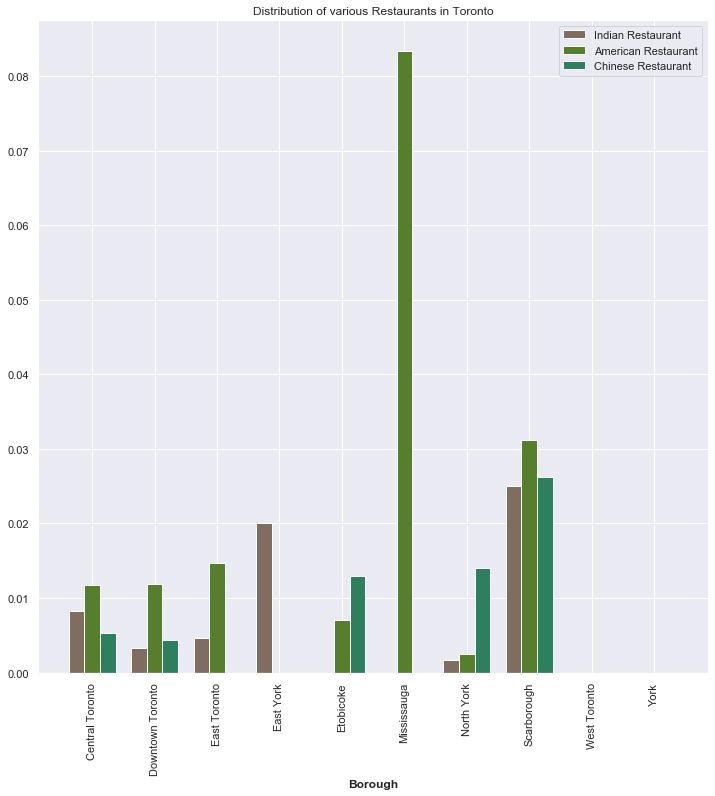

In [875]:
# Bar Chart Toronto: Distribution of Indian, American and Chinese Restaurant in Boroughs

import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = toronto_INR['Indian Restaurant']
bars2 = toronto_INR['American Restaurant']
bars3 = toronto_INR['Chinese Restaurant']

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Make the plot
plt.subplots(figsize=(12,12))
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Indian Restaurant')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='American Restaurant')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='Chinese Restaurant')

 
# Add xticks on the middle of the group bars
plt.xlabel('Borough', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], toronto_INR['Borough'], rotation=90)
plt.title('Distribution of various Restaurants in Toronto')
# Create legend & Show graphic
plt.legend()
plt.show()


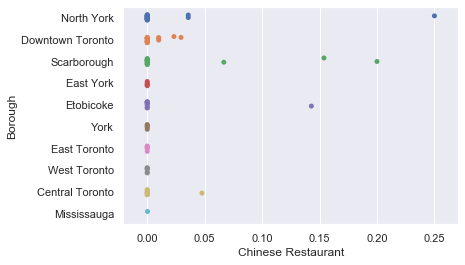

In [885]:
#Trying Stripplot 
import seaborn as sns
stripplot_venucat = sns.stripplot(data=toronto_merged, y='Borough', x='Chinese Restaurant', jitter=0.15, dodge=False, orient='h')

### Let's perform the webscraping of New York Neighborhood

In [325]:
# Data download, scraping and wrangling
from bs4 import BeautifulSoup
import lxml
List_url = "https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoods.htm"
source = requests.get(List_url).text
soup = BeautifulSoup(source, 'xml')
soup.title
soup.title.string

'NYC Neighborhood ZIP Code Definitions'

In [326]:
print(soup.prettify())

<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<!-- INCLUDE HEADER Version 1.05 7/26/2007 PAGE LAST MODIFIED Monday, 23-Feb-2015 12:15:40 EST -->
<html lang="en-us" xml:lang="en-us" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <title>
   NYC Neighborhood ZIP Code Definitions
  </title>
  <meta content="Definitions of New York City Neighborhoods" name="description"/>
  <meta content="neighborhood, Neighborhood, New York City, new york city,new york state, New York State" name="keywords"/>
  <!-- THE FOLLOWING STYLE TAG IS FOR IMPORTING STYLE ONLY -->
  <style type="text/css">
   <!--
-->
  </style>
  <!-- -->
  <!-- -->
  <!-- -->
  <!-- -->
  <meta content="text/html; charset=UTF-8" http-equiv="Content-Type"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="IE=edge" http-equiv="x-ua-compatible"/>
  <link href="/style/twenty16/main.css" media=

In [328]:
new_table=soup.find_all("table")
new_table

[<table summary=" ">
 <tr>
 <th abbr="Borough" id="header1">Borough</th>
 <th abbr="Neighborhood" id="header2">Neighborhood</th>
 <th abbr="ZIP Codes" id="header3">ZIP Codes</th>
 </tr><tr>
 <td headers="header1" rowspan="7">Bronx</td>
 <td headers="header2"> Central Bronx</td>
 <td headers="header3"> 10453, 10457, 10460</td>
 </tr><tr>
 <td headers="header2"> Bronx Park and Fordham</td>
 <td headers="header3"> 10458, 10467, 10468</td>
 </tr><tr>
 <td headers="header2"> High Bridge and Morrisania</td>
 <td headers="header3"> 10451, 10452, 10456</td>
 </tr><tr>
 <td headers="header2"> Hunts Point and Mott Haven</td>
 <td headers="header3"> 10454, 10455, 10459, 10474</td>
 </tr><tr>
 <td headers="header2"> Kingsbridge and Riverdale</td>
 <td headers="header3"> 10463, 10471</td>
 </tr><tr>
 <td headers="header2"> Northeast Bronx</td>
 <td headers="header3"> 10466, 10469, 10470, 10475</td>
 </tr><tr>
 <td headers="header2"> Southeast Bronx</td>
 <td headers="header3"> 10461, 10462,10464, 1

In [504]:
# Let's now save this data into a dataframe
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoods.htm'
page = requests.get(url)

soup = BeautifulSoup(page.content, 'html.parser')

tbl = soup.find("table",{"summary":" "})

data_frame = pd.read_html(str(tbl))[0]

In [482]:
data_frame.head(20)

Borough                Neighborhood  \
0       Bronx               Central Bronx   
1       Bronx      Bronx Park and Fordham   
2       Bronx  High Bridge and Morrisania   
3       Bronx  Hunts Point and Mott Haven   
4       Bronx   Kingsbridge and Riverdale   
5       Bronx             Northeast Bronx   
6       Bronx             Southeast Bronx   
7    Brooklyn            Central Brooklyn   
8    Brooklyn          Southwest Brooklyn   
9    Brooklyn                Borough Park   
10   Brooklyn      Canarsie and Flatlands   
11   Brooklyn           Southern Brooklyn   
12   Brooklyn          Northwest Brooklyn   
13   Brooklyn                    Flatbush   
14   Brooklyn  East New York and New Lots   
15   Brooklyn                  Greenpoint   
16   Brooklyn                 Sunset Park   
17   Brooklyn   Bushwick and Williamsburg   
18  Manhattan              Central Harlem   
19  Manhattan         Chelsea and Clinton   

                                   ZIP Codes  
0                        10453, 10457, 10460  
1                        10458, 10467, 10468  
2                        10451, 10452, 10456  
3                 10454, 10455, 10459, 10474  
4                               10463, 10471  
5                 10466, 10469, 10470, 10475  
6    10461, 10462,10464, 10465, 10472, 10473  
7          11212, 11213, 11216, 11233, 11238  
8                        11209, 11214, 11228  
9                 11204, 11218, 11219, 11230  
10                       11234, 11236, 11239  
11                11223, 11224, 11229, 11235  
12         11201, 11205, 11215, 11217, 11231  
13                11203, 11210, 11225, 11226  
14                              11207, 11208  
15                              11211, 11222  
16                              11220, 11232  
17                       11206, 11221, 11237  
18         10026, 10027, 10030, 10037, 10039  
19  10001, 10011, 10018, 10019, 10020, 10036

In [509]:
data_frame['ZIP Codes'] = data_frame['ZIP Codes'].str[:5]

In [510]:
data_frame.head()

Borough                Neighborhood ZIP Codes
0   Bronx               Central Bronx     10453
1   Bronx      Bronx Park and Fordham     10458
2   Bronx  High Bridge and Morrisania     10451
3   Bronx  Hunts Point and Mott Haven     10454
4   Bronx   Kingsbridge and Riverdale     10463

In [511]:
data_frame.shape

(42, 3)

In [513]:
#taking care of the duplicate values

data_frame2 = data_frame2.drop_duplicates(subset='City', keep='first', inplace=False)
data_frame2.head(50)

Borough         Neighborhood  ZIP Codes              City State  \
0           Bronx        Central Bronx      10453             Bronx    NY   
7        Brooklyn     Central Brooklyn      11212          Brooklyn    NY   
18      Manhattan       Central Harlem      10026          New York    NY   
27         Queens     Northeast Queens      11361           Bayside    NY   
28         Queens         North Queens      11354          Flushing    NY   
29         Queens       Central Queens      11365     Fresh Meadows    NY   
30         Queens              Jamaica      11412      Saint Albans    NY   
31         Queens     Northwest Queens      11101  Long Island City    NY   
32         Queens  West Central Queens      11374         Rego Park    NY   
33         Queens            Rockaways      11691      Far Rockaway    NY   
34         Queens     Southeast Queens      11004         Glen Oaks    NY   
35         Queens     Southwest Queens      11414      Howard Beach    NY   
36         Queens          West Queens      11368            Corona    NY   
37  Staten Island        Port Richmond      10302     Staten Island    NY   

     Latitude  Longitude  
0   40.853017  -73.91214  
7   40.662191  -73.91328  
18  40.802853  -73.95471  
27  40.763177  -73.77392  
28  40.767969  -73.82496  
29  40.738983  -73.79209  
30  40.697188  -73.75948  
31  40.745341  -73.93907  
32  40.724945  -73.86090  
33  40.600020  -73.75962  
34  40.742944  -73.70956  
35  40.658188  -73.84321  
36  40.747106  -73.85838  
37  40.631127  -74.13715

In [514]:
#add Geo-spatial data
NY_ll= pd.read_csv(r'/Users/rohan/Downloads/NY-zip-data.csv')
NY_ll.head(10)
NY_ll.rename(columns={'Zip':'ZIP Codes'}, inplace=True)
NY_ll.set_index("ZIP Codes")

City State   Latitude  Longitude
ZIP Codes                                                    
14043                       Depew    NY  42.904958 -78.700600
13827                       Owego    NY  42.120274 -76.258740
14739                  Friendship    NY  42.192384 -78.143080
11703               North Babylon    NY  40.733398 -73.322570
11707                West Babylon    NY  40.922326 -72.637078
12442                      Hunter    NY  42.222061 -74.234180
13334                       Eaton    NY  42.839170 -75.654820
13626                  Copenhagen    NY  43.859025 -75.729420
10965                 Pearl River    NY  41.063329 -74.017340
12151                  Round Lake    NY  42.932326 -73.793630
12195                West Lebanon    NY  42.479384 -73.474809
14617                   Rochester    NY  43.223213 -77.597210
11716                     Bohemia    NY  40.770042 -73.113760
12719                  Barryville    NY  41.480326 -74.926940
13479            Washington Mills    NY  43.053769 -75.271559
10072                    New York    NY  40.780751 -73.977182
10166                    New York    NY  40.754591 -73.976238
10998                    Westtown    NY  41.334034 -74.545930
11560               Locust Valley    NY  40.881957 -73.594170
14150                   Tonawanda    NY  43.001907 -78.863100
12197                   Worcester    NY  42.610314 -74.724010
13147               Scipio Center    NY  42.774714 -76.570450
12771                 Port Jervis    NY  41.374734 -74.663150
12810                       Athol    NY  43.484741 -73.891510
13350                    Herkimer    NY  43.038149 -74.984600
13655                  Hogansburg    NY  44.981840 -74.673740
13788                      Hobart    NY  42.368357 -74.664520
14717                    Caneadea    NY  42.370740 -78.193350
13459              Sharon Springs    NY  42.774077 -74.584040
14642                   Rochester    NY  43.286024 -77.684264
10986                Tomkins Cove    NY  41.271543 -73.986760
11763                     Medford    NY  40.820786 -72.983750
12139                      Piseco    NY  43.402760 -74.569720
12509                   La Grange    NY  41.643599 -73.847176
13503                       Utica    NY  43.101869 -75.231158
13135                     Phoenix    NY  43.235916 -76.313390
14301               Niagara Falls    NY  43.096555 -79.039250
13082                   Kirkville    NY  43.099547 -75.961900
10506                     Bedford    NY  41.195778 -73.627770
13312                 Brantingham    NY  43.689564 -75.272520
12789                   Woodridge    NY  41.708062 -74.569800
14472               Honeoye Falls    NY  42.964593 -77.591900
11783                     Seaford    NY  40.679752 -73.489590
12245                      Albany    NY  42.614852 -73.970812
12861              Putnam Station    NY  43.745310 -73.415690
13860              West Davenport    NY  42.183045 -74.925617
14612                   Rochester    NY  43.256462 -77.661830
13840                   Smithboro    NY  42.039512 -76.400376
14754              Little Genesee    NY  42.020028 -78.203680
14901                      Elmira    NY  42.091924 -76.792170
12305                 Schenectady    NY  42.814476 -73.943370
12402                    Kingston    NY  41.878801 -74.345684
13843            South New Berlin    NY  42.533274 -75.380080
10607                White Plains    NY  41.041191 -73.809530
13664                  Morristown    NY  44.585561 -75.647970
14482                      Le Roy    NY  42.979887 -77.970530
14214                     Buffalo    NY  42.941407 -78.837410
10268                    New York    NY  40.780751 -73.977182
10917              Central Valley    NY  41.322344 -74.123540
12784               Thompsonville    NY  41.676139 -74.621700
13104                     Manlius    NY  42.987329 -75.967630
13208                    Syracuse    NY  43.074566 -76.147470
10547                Mohegan Lake    NY  41.314676 -73.851180

In [515]:
NY_ll.dtypes

ZIP Codes      int64
City          object
State         object
Latitude     float64
Longitude    float64
dtype: object

In [516]:
#typecasting for merging the dataframes
data_frame['ZIP Codes']=data_frame['ZIP Codes'].astype(int)

In [517]:
data_frame.dtypes

Borough         object
Neighborhood    object
ZIP Codes        int64
dtype: object

In [518]:
#merging geographical coordinates dataframe with the neighborhood dataframe
data_frame2=pd.merge(data_frame, NY_ll)
data_frame2.head(50)

Borough                   Neighborhood  ZIP Codes              City  \
0           Bronx                  Central Bronx      10453             Bronx   
1           Bronx         Bronx Park and Fordham      10458             Bronx   
2           Bronx     High Bridge and Morrisania      10451             Bronx   
3           Bronx     Hunts Point and Mott Haven      10454             Bronx   
4           Bronx      Kingsbridge and Riverdale      10463             Bronx   
5           Bronx                Northeast Bronx      10466             Bronx   
6           Bronx                Southeast Bronx      10461             Bronx   
7        Brooklyn               Central Brooklyn      11212          Brooklyn   
8        Brooklyn             Southwest Brooklyn      11209          Brooklyn   
9        Brooklyn                   Borough Park      11204          Brooklyn   
10       Brooklyn         Canarsie and Flatlands      11234          Brooklyn   
11       Brooklyn              Southern Brooklyn      11223          Brooklyn   
12       Brooklyn             Northwest Brooklyn      11201          Brooklyn   
13       Brooklyn                       Flatbush      11203          Brooklyn   
14       Brooklyn     East New York and New Lots      11207          Brooklyn   
15       Brooklyn                     Greenpoint      11211          Brooklyn   
16       Brooklyn                    Sunset Park      11220          Brooklyn   
17       Brooklyn      Bushwick and Williamsburg      11206          Brooklyn   
18      Manhattan                 Central Harlem      10026          New York   
19      Manhattan            Chelsea and Clinton      10001          New York   
20      Manhattan                    East Harlem      10029          New York   
21      Manhattan  Gramercy Park and Murray Hill      10010          New York   
22      Manhattan     Greenwich Village and Soho      10012          New York   
23      Manhattan                Lower East Side      10002          New York   
24      Manhattan                Upper East Side      10021          New York   
25      Manhattan                Upper West Side      10023          New York   
26      Manhattan  Inwood and Washington Heights      10031          New York   
27         Queens               Northeast Queens      11361           Bayside   
28         Queens                   North Queens      11354          Flushing   
29         Queens                 Central Queens      11365     Fresh Meadows   
30         Queens                        Jamaica      11412      Saint Albans   
31         Queens               Northwest Queens      11101  Long Island City   
32         Queens            West Central Queens      11374         Rego Park   
33         Queens                      Rockaways      11691      Far Rockaway   
34         Queens               Southeast Queens      11004         Glen Oaks   
35         Queens               Southwest Queens      11414      Howard Beach   
36         Queens                    West Queens      11368            Corona   
37  Staten Island                  Port Richmond      10302     Staten Island   
38  Staten Island                    South Shore      10306     Staten Island   
39  Staten Island       Stapleton and St. George      10301     Staten Island   
40  Staten Island                     Mid-Island      10314     Staten Island   

   State   Latitude  Longitude  
0     NY  40.853017  -73.91214  
1     NY  40.864166  -73.88881  
2     NY  40.819729  -73.92230  
3     NY  40.805968  -73.91628  
4     NY  40.881086  -73.90749  
5     NY  40.890950  -73.84702  
6     NY  40.842917  -73.83819  
7     NY  40.662191  -73.91328  
8     NY  40.623270  -74.02950  
9     NY  40.618944  -73.98473  
10    NY  40.618561  -73.92160  
11    NY  40.598142  -73.97229  
12    NY  40.695286  -73.98907  
13    NY  40.649059  -73.93304  
14    NY  40.670874  -73.89424  
15    NY  40.712090  -73.95427  
16    NY  40.641436  -74.01574  
17    NY  40.

In [519]:
data_frame2.shape

(41, 7)

In [520]:
#In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent to_explorer, as shown below
address_ny = 'New York, NY, US'
geolocator_ny = Nominatim(user_agent="to_explore")
location_ny = geolocator.geocode(address_ny)
latitude_ny = location_ny.latitude
longitude_ny = location_ny.longitude
print('The geograpical coordinate of New York are {}, {}.'.format(latitude_ny, longitude_ny))

The geograpical coordinate of New York are 40.7127281, -74.0060152.


In [521]:
# create map of New York displaying the Neighborhood data

map_ny = folium.Map(location=[latitude_ny, longitude_ny], zoom_start=10)

# add markers to map
for lat, lng, neighborhood, borough in zip(data_frame2['Latitude'], data_frame2['Longitude'], data_frame2['Neighborhood'], data_frame2['Borough']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ny)  
    
map_ny

In [522]:
#Explore Neighborhoods in New York
data_frame2.loc[0, 'Neighborhood']

'Central Bronx'

In [524]:
N_latitude = data_frame2.loc[0, 'Latitude'] # neighborhood latitude value
N_longitude = data_frame2.loc[0, 'Longitude'] # neighborhood longitude value

Neighborhood_name = data_frame2.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(Neighborhood_name, 
                                                               N_latitude, 
                                                               N_longitude))

Latitude and longitude values of Central Bronx are 40.853017, -73.91214000000001.


In [526]:
# Webscraping of New York zipcodes data using Foursquare API

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    N_latitude, 
    N_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=FG4ZQINCPVMRGMDEFT0OQVQCIMGOID4BJL0ZKYKTDX5AP11E&client_secret=EVCT0GY05ZFUB4SZ2IY1H3FD2SAAHPBPQRAMLEOAWG5A4IUI&v=20180605&ll=40.853017,-73.91214000000001&radius=500&limit=100'

In [527]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venuesList_ny=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results_ny = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venuesList_ny.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results_ny])

    nearbyVenues_ny = pd.DataFrame([item for venue_list in venuesList_ny for item in venue_list])
    nearbyVenues_ny.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearbyVenues_ny)

def getNewYorkCoords():
    geolocator = Nominatim()
    location = geolocator.geocode(address)
    latitude_ny = location_ny.latitude
    longitude_ny = location_ny.longitude
    return location, latitude, longitude

NYVenues = getNearbyVenues(names=data_frame2['Neighborhood'],
                                   latitudes=data_frame2['Latitude'],
                                   longitudes=data_frame2['Longitude']
                                  )


NYData = data_frame2.reset_index()



Central Bronx
Bronx Park and Fordham
High Bridge and Morrisania
Hunts Point and Mott Haven
Kingsbridge and Riverdale
Northeast Bronx
Southeast Bronx
Central Brooklyn
Southwest Brooklyn
Borough Park
Canarsie and Flatlands
Southern Brooklyn
Northwest Brooklyn
Flatbush
East New York and New Lots
Greenpoint
Sunset Park
Bushwick and Williamsburg
Central Harlem
Chelsea and Clinton
East Harlem
Gramercy Park and Murray Hill
Greenwich Village and Soho
Lower East Side
Upper East Side
Upper West Side
Inwood and Washington Heights
Northeast Queens
North Queens
Central Queens
Jamaica
Northwest Queens
West Central Queens
Rockaways
Southeast Queens
Southwest Queens
West Queens
Port Richmond
South Shore
Stapleton and St. George
Mid-Island


In [528]:
NYVenues.head(10)

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Central Bronx              40.853017               -73.91214   
1  Central Bronx              40.853017               -73.91214   
2  Central Bronx              40.853017               -73.91214   
3  Central Bronx              40.853017               -73.91214   
4  Central Bronx              40.853017               -73.91214   
5  Central Bronx              40.853017               -73.91214   
6  Central Bronx              40.853017               -73.91214   
7  Central Bronx              40.853017               -73.91214   
8  Central Bronx              40.853017               -73.91214   
9  Central Bronx              40.853017               -73.91214   

                Venue  Venue Latitude  Venue Longitude  \
0     Accra Resturant       40.853871       -73.908421   
1  Bravo Supermarkets       40.854107       -73.914162   
2            Wingstop       40.854093       -73.907899   
3   Papa John's Pizza       40.852429       -73.908976   
4        Food Dynasty       40.853772       -73.909267   
5            T-Mobile       40.850147       -73.916581   
6            Liberato       40.853744       -73.907966   
7      Domino's Pizza       40.854541       -73.907037   
8             Dunkin'       40.853669       -73.908844   
9          Chase Bank       40.854120       -73.907555   

              Venue Category  
0         African Restaurant  
1              Grocery Store  
2                Wings Joint  
3                Pizza Place  
4                Supermarket  
5          Mobile Phone Shop  
6  Latin American Restaurant  
7                Pizza Place  
8                 Donut Shop  
9                       Bank

In [532]:
#Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(NYVenues['Venue Category'].unique())))

There are 260 uniques categories.


### Let's now analyze New York Neighborhoods

In [534]:
# one hot encoding
ny_onehot = pd.get_dummies(NYVenues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ny_onehot['Neighborhood'] = NYVenues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [ny_onehot.columns[-1]] + list(ny_onehot.columns[:-1])
ny_onehot.head(50)

Accessories Store  Adult Boutique  Afghan Restaurant  African Restaurant  \
0                   0               0                  0                   1   
1                   0               0                  0                   0   
2                   0               0                  0                   0   
3                   0               0                  0                   0   
4                   0               0                  0                   0   
5                   0               0                  0                   0   
6                   0               0                  0                   0   
7                   0               0                  0                   0   
8                   0               0                  0                   0   
9                   0               0                  0                   0   
10                  0               0                  0                   0   
11                  0               0                  0                   0   
12                  0               0                  0                   0   
13                  0               0                  0                   0   
14                  0               0                  0                   0   
15                  0               0                  0                   0   
16                  0               0                  0                   0   
17                  0               0                  0                   0   
18                  0               0                  0                   0   
19                  0               0                  0                   0   
20                  0               0                  0                   0   
21                  0               0                  0                   0   
22                  0               0                  0                   0   
23                  0               0                  0                   0   
24                  0               0                  0                   0   
25                  0               0                  0                   0   
26                  0               0                  0                   0   
27                  0               0                  0                   0   
28                  0               0                  0                   0   
29                  0               0                  0                   0   
30                  0               0                  0                   0   
31                  0               0                  0                   0   
32                  0               0                  0                   0   
33                  0               0                  0                   0   
34                  0               0                  0                   0   
35                  0               0                  0                   0   
36                  0               0                  0                   0   
37                  0               0                  0                   0   
38                  0               0                  0                   0   
39                  0               0                  0                   0   
40                  0               0                  0                   0   
41                  0               0                  0                   0   
42                  0               0                  0                   0   
43                  0               0                  0                   0   
44                  0               0                  0                   0   
45                  0               0                  0                   0   
46                  0               0                  0                   0   
47                  0               0                  0                   0   
48                  0               0                  0                   0   
49  

In [643]:
#Onehot encoding of New York data

ny_grouped = ny_onehot.groupby('Neighborhood').mean().reset_index()
ny_grouped

Neighborhood  Accessories Store  Adult Boutique  \
0                    Borough Park               0.00            0.00   
1          Bronx Park and Fordham               0.00            0.00   
2       Bushwick and Williamsburg               0.00            0.00   
3          Canarsie and Flatlands               0.00            0.00   
4                   Central Bronx               0.00            0.00   
5                Central Brooklyn               0.00            0.00   
6                  Central Harlem               0.00            0.00   
7                  Central Queens               0.00            0.00   
8             Chelsea and Clinton               0.00            0.00   
9                     East Harlem               0.00            0.00   
10     East New York and New Lots               0.00            0.00   
11                       Flatbush               0.00            0.00   
12  Gramercy Park and Murray Hill               0.00            0.00   
13                     Greenpoint               0.00            0.00   
14     Greenwich Village and Soho               0.00            0.00   
15     High Bridge and Morrisania               0.00            0.00   
16     Hunts Point and Mott Haven               0.00            0.00   
17  Inwood and Washington Heights               0.00            0.00   
18                        Jamaica               0.00            0.00   
19      Kingsbridge and Riverdale               0.00            0.00   
20                Lower East Side               0.00            0.01   
21                     Mid-Island               0.00            0.00   
22                   North Queens               0.00            0.00   
23                Northeast Bronx               0.00            0.00   
24               Northeast Queens               0.00            0.00   
25             Northwest Brooklyn               0.00            0.00   
26               Northwest Queens               0.00            0.00   
27                  Port Richmond               0.00            0.00   
28                      Rockaways               0.00            0.00   
29                    South Shore               0.00            0.00   
30                Southeast Bronx               0.00            0.00   
31               Southeast Queens               0.00            0.00   
32              Southern Brooklyn               0.00            0.00   
33             Southwest Brooklyn               0.00            0.00   
34               Southwest Queens               0.00            0.00   
35       Stapleton and St. George               0.00            0.00   
36                    Sunset Park               0.00            0.00   
37                Upper East Side               0.00            0.00   
38                Upper West Side               0.01            0.00   
39            West Central Queens               0.00            0.00   
40                    West Queens               0.00            0.00   

    Afghan Restaurant  African Restaurant  American Restaurant   Arcade  \
0            0.000000            0.000000             0.000000  0.00000   
1            0.000000            0.000000             0.000000  0.00000   
2            0.000000            0.000000             0.000000  0.00000   
3            0.000000            0.000000             0.031250  0.00000   
4            0.000000            0.028571             0.000000  0.00000   
5            0.000000            0.000000             0.000000  0.00000   
6            0.000000            0.034483             0.000000  0.00000   
7            0.000000            0.000000             0.034483  0.00000   
8            0.000000            0.000000             0.013889  0.00000   
9            0.000000            0.000000             0.020408  0.00000   
10           0.000000            0.000000             0.000000  0.00000   
11           0.000000            0.000000             0.000000  0.00000   
12           0.000000

In [882]:
#Getting our dataframe ready for plotting the graphs for further analysis

ny_mergedtemp=pd.merge(data_frame2,ny_grouped[['Neighborhood','Indian Restaurant','American Restaurant','Chinese Restaurant']],on='Neighborhood')
ny_mergedtemp

Borough                   Neighborhood  ZIP Codes              City  \
0           Bronx                  Central Bronx      10453             Bronx   
1           Bronx         Bronx Park and Fordham      10458             Bronx   
2           Bronx     High Bridge and Morrisania      10451             Bronx   
3           Bronx     Hunts Point and Mott Haven      10454             Bronx   
4           Bronx      Kingsbridge and Riverdale      10463             Bronx   
5           Bronx                Northeast Bronx      10466             Bronx   
6           Bronx                Southeast Bronx      10461             Bronx   
7        Brooklyn               Central Brooklyn      11212          Brooklyn   
8        Brooklyn             Southwest Brooklyn      11209          Brooklyn   
9        Brooklyn                   Borough Park      11204          Brooklyn   
10       Brooklyn         Canarsie and Flatlands      11234          Brooklyn   
11       Brooklyn              Southern Brooklyn      11223          Brooklyn   
12       Brooklyn             Northwest Brooklyn      11201          Brooklyn   
13       Brooklyn                       Flatbush      11203          Brooklyn   
14       Brooklyn     East New York and New Lots      11207          Brooklyn   
15       Brooklyn                     Greenpoint      11211          Brooklyn   
16       Brooklyn                    Sunset Park      11220          Brooklyn   
17       Brooklyn      Bushwick and Williamsburg      11206          Brooklyn   
18      Manhattan                 Central Harlem      10026          New York   
19      Manhattan            Chelsea and Clinton      10001          New York   
20      Manhattan                    East Harlem      10029          New York   
21      Manhattan  Gramercy Park and Murray Hill      10010          New York   
22      Manhattan     Greenwich Village and Soho      10012          New York   
23      Manhattan                Lower East Side      10002          New York   
24      Manhattan                Upper East Side      10021          New York   
25      Manhattan                Upper West Side      10023          New York   
26      Manhattan  Inwood and Washington Heights      10031          New York   
27         Queens               Northeast Queens      11361           Bayside   
28         Queens                   North Queens      11354          Flushing   
29         Queens                 Central Queens      11365     Fresh Meadows   
30         Queens                        Jamaica      11412      Saint Albans   
31         Queens               Northwest Queens      11101  Long Island City   
32         Queens            West Central Queens      11374         Rego Park   
33         Queens                      Rockaways      11691      Far Rockaway   
34         Queens               Southeast Queens      11004         Glen Oaks   
35         Queens               Southwest Queens      11414      Howard Beach   
36         Queens                    West Queens      11368            Corona   
37  Staten Island                  Port Richmond      10302     Staten Island   
38  Staten Island                    South Shore      10306     Staten Island   
39  Staten Island       Stapleton and St. George      10301     Staten Island   
40  Staten Island                     Mid-Island      10314     Staten Island   

   State   Latitude  Longitude  Cluster Labels  Indian Restaurant  \
0     NY  40.853017  -73.91214               0           0.000000   
1     NY  40.864166  -73.88881               0           0.000000   
2     NY  40.819729  -73.92230               0           0.000000   
3     NY  40.805968  -73.91628               1           0.000000   
4     NY  40.881086  -73.90749               0           0.000000   
5     NY  40.890950  -73.84702               1           0.000000   
6     NY  40.842917  -73.83819               1           0.000000   
7     NY  40.662191  -73.91328               1         

In [883]:
# Dropping the Cluster Labels column for our dataframe
ny_merged=ny_mergedtemp.drop('Cluster Labels',axis=1)
ny_INR = ny_merged.groupby('Borough').mean().reset_index()
ny_INR

Borough     ZIP Codes   Latitude  Longitude  Indian Restaurant  \
0          Bronx  10458.000000  40.851119 -73.890319           0.000000   
1       Brooklyn  11211.818182  40.653836 -73.959149           0.000909   
2      Manhattan  10017.222222  40.766436 -73.972941           0.015270   
3         Queens  11344.400000  40.718586 -73.812119           0.012279   
4  Staten Island  10305.750000  40.609658 -74.123612           0.000000   

   American Restaurant  Chinese Restaurant  
0             0.003484            0.034526  
1             0.008703            0.060162  
2             0.015451            0.019747  
3             0.014637            0.016791  
4             0.000000            0.044231

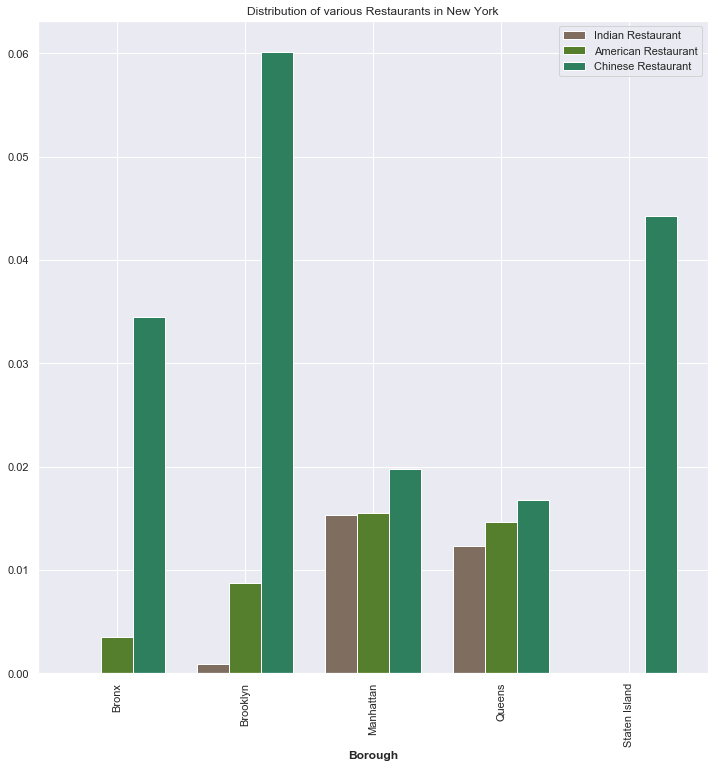

In [884]:
# Bar Chart Toronto: Distribution of Indian, American and Chinese Restaurant in Boroughs

import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = ny_INR['Indian Restaurant']
bars2 = ny_INR['American Restaurant']
bars3 = ny_INR['Chinese Restaurant']

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Make the plot
plt.subplots(figsize=(12,12))
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Indian Restaurant')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='American Restaurant')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='Chinese Restaurant')

 
# Add xticks on the middle of the group bars
plt.xlabel('Borough', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ny_INR['Borough'], rotation=90)
plt.title('Distribution of various Restaurants in New York')
# Create legend & Show graphic
plt.legend()
plt.show()



# Lets now find top 10 most common venues per neighborhood for both cities and put them into a dataframe for further analysis

In [767]:
for hood in ny_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = ny_grouped[ny_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Borough Park----
                venue  freq
0  Chinese Restaurant  0.17
1   Convenience Store  0.08
2       Deli / Bodega  0.06
3         Pizza Place  0.06
4            Pharmacy  0.06
5          Bagel Shop  0.06
6                Bank  0.06
7                Café  0.03
8       Grocery Store  0.03
9       Big Box Store  0.03


----Bronx Park and Fordham----
                  venue  freq
0           Pizza Place  0.05
1         Deli / Bodega  0.05
2                 Plaza  0.05
3            Donut Shop  0.05
4           Coffee Shop  0.05
5  Gym / Fitness Center  0.05
6        Sandwich Place  0.05
7    Mexican Restaurant  0.03
8                  Café  0.03
9                Market  0.03


----Bushwick and Williamsburg----
                       venue  freq
0              Deli / Bodega  0.12
1         Mexican Restaurant  0.12
2                     Bakery  0.08
3                      Hotel  0.04
4               Cocktail Bar  0.04
5         Chinese Restaurant  0.04
6  Latin American Restauran

In [887]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

# create a new dataframe
NYCom_venues = pd.DataFrame(columns=columns) ## assign column names we just created to a new dataframe
NYCom_venues['Neighborhood'] = ny_grouped['Neighborhood']## add neighborhoods column

for ind in np.arange(ny_grouped.shape[0]):
    NYCom_venues.iloc[ind, 1:] = return_most_common_venues(ny_grouped.iloc[ind, :], num_top_venues)

NYCom_venues.head(41)

Neighborhood  1st Most Common Venue  \
0                    Borough Park     Chinese Restaurant   
1          Bronx Park and Fordham            Coffee Shop   
2       Bushwick and Williamsburg     Mexican Restaurant   
3          Canarsie and Flatlands     Italian Restaurant   
4                   Central Bronx     Chinese Restaurant   
5                Central Brooklyn  Performing Arts Venue   
6                  Central Harlem                   Park   
7                  Central Queens                   Bank   
8             Chelsea and Clinton           Dance Studio   
9                     East Harlem     Mexican Restaurant   
10     East New York and New Lots            Pizza Place   
11                       Flatbush   Caribbean Restaurant   
12  Gramercy Park and Murray Hill      Indian Restaurant   
13                     Greenpoint                    Bar   
14     Greenwich Village and Soho     Italian Restaurant   
15     High Bridge and Morrisania         Ice Cream Shop   
16     Hunts Point and Mott Haven            Pizza Place   
17  Inwood and Washington Heights          Deli / Bodega   
18                        Jamaica   Caribbean Restaurant   
19      Kingsbridge and Riverdale            Pizza Place   
20                Lower East Side            Pizza Place   
21                     Mid-Island               Bus Stop   
22                   North Queens      Korean Restaurant   
23                Northeast Bronx            Supermarket   
24               Northeast Queens                    Bar   
25             Northwest Brooklyn          Deli / Bodega   
26               Northwest Queens            Coffee Shop   
27                  Port Richmond            Pizza Place   
28                      Rockaways          Deli / Bodega   
29                    South Shore          Deli / Bodega   
30                Southeast Bronx   Fast Food Restaurant   
31               Southeast Queens              Gift Shop   
32              Southern Brooklyn            Pizza Place   
33             Southwest Brooklyn                    Spa   
34               Southwest Queens     Italian Restaurant   
35       Stapleton and St. George               Bus Stop   
36                    Sunset Park            Pizza Place   
37                Upper East Side            Coffee Shop   
38                Upper West Side                Theater   
39            West Central Queens    Japanese Restaurant   
40                    West Queens     Mexican Restaurant   

   2nd Most Common Venue      3rd Most Common Venue  \
0      Convenience Store              Deli / Bodega   
1         Sandwich Place                      Plaza   
2          Deli / Bodega                     Bakery   
3     Chinese Restaurant        Japanese Restaurant   
4            Pizza Place                       Bank   
5            Pizza Place                       Park   
6            Coffee Shop                 Playground   
7                  Hotel             Ice Cream Shop   
8            Music Venue                      Hotel   
9        Thai Restaurant              Deli / Bodega   
10         Deli / Bodega                Supermarket   
11                  Bank                 Restaurant   
12    Italian Restaurant                        Bar   
13           Pizza Place                Coffee Shop   
14           Coffee Shop   Mediterranean Restaurant   
15           Pizza Place       Fast Food Restaurant   
16            Donut Shop                        Gym   
17                  Café                Pizza Place   
18     Fish & Chips Shop                   Pharmacy   
19           Supermarket             Sandwich Place   
20           Coffee Shop                        Bar   
21    Italian Restaurant                 Bagel Shop   
22           Supermarket              Grocery Store   
23          Dessert Shop       Caribbean Restaurant   
24   American Restaurant                Pizza Place   
25                  Park                        Gym   
26            D

In [886]:
NYCom_venues.shape

(41, 11)

In [782]:
for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                             venue  freq
0                   Cluster Labels   1.0
1                   Clothing Store   0.2
2                           Lounge   0.2
3                   Breakfast Spot   0.2
4                     Skating Rink   0.2
5        Latin American Restaurant   0.2
6  Molecular Gastronomy Restaurant   0.0
7       Modern European Restaurant   0.0
8                Mobile Phone Shop   0.0
9               Miscellaneous Shop   0.0


----Alderwood / Long Branch----
                venue  freq
0      Cluster Labels   1.0
1         Pizza Place   0.2
2  Athletics & Sports   0.1
3                 Pub   0.1
4         Coffee Shop   0.1
5        Dance Studio   0.1
6      Sandwich Place   0.1
7        Skating Rink   0.1
8            Pharmacy   0.1
9                 Gym   0.1


----Bathurst Manor / Wilson Heights / Downsview North----
                       venue  freq
0             Cluster Labels  1.00
1                       Bank  0.10
2                Coffee 

In [544]:
#defined common function for getting most common venues

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Most common venues analysis for Toronto City

In [786]:
toronto_grouped1=toronto_grouped.drop(['Cluster Labels'], axis=1)
# create a new dataframe
Tneighborhoods_venues_sorted = pd.DataFrame(columns=columns) ## assign column names we just created to a new dataframe
Tneighborhoods_venues_sorted['Neighborhood'] = toronto_grouped1['Neighborhood']## add neighborhoods column

for ind in np.arange(toronto_grouped1.shape[0]):
    Tneighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped1.iloc[ind, :], num_top_venues)

Tneighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue  \
0                                          Agincourt        Clothing Store   
1                            Alderwood / Long Branch           Pizza Place   
2  Bathurst Manor / Wilson Heights / Downsview North           Coffee Shop   
3                                    Bayview Village   Japanese Restaurant   
4                 Bedford Park / Lawrence Manor East       Thai Restaurant   

  2nd Most Common Venue      3rd Most Common Venue 4th Most Common Venue  \
0                Lounge  Latin American Restaurant          Skating Rink   
1                   Gym             Sandwich Place          Skating Rink   
2                  Bank         Frozen Yogurt Shop           Bridal Shop   
3                  Café                       Bank    Chinese Restaurant   
4        Sandwich Place         Italian Restaurant            Restaurant   

  5th Most Common Venue 6th Most Common Venue    7th Most Common Venue  \
0        Breakfast Spot             Drugstore           Discount Store   
1          Dance Studio              Pharmacy              Coffee Shop   
2        Sandwich Place                 Diner               Restaurant   
3        Discount Store   Distribution Center                  Dog Run   
4           Coffee Shop             Juice Bar  Comfort Food Restaurant   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0   Distribution Center               Dog Run       Doner Restaurant  
1    Athletics & Sports                   Pub     Dim Sum Restaurant  
2         Deli / Bodega           Supermarket         Ice Cream Shop  
3      Doner Restaurant            Donut Shop            Yoga Studio  
4                   Spa     Indian Restaurant                Butcher

In [888]:
Tneighborhoods_venues_sorted.shape

(95, 11)

# Results and Discussion

***We have plotted the neighborhood data on the folium map for both Cities.***\
This will offer the reader a visualization of the regions of Toronto and New York, that we are working upon.

***Plot and find the relationship between Neighborhoods and Various Restaurants for both cities.***\
These plots will help the reader to identify the Neighborhood for enjoying his/her choice for cuisines among Indian, American and Chinese.\
***In Toronto City*** most Indian Restaurants could be found in Central Toronto, Scarborough or East York, while Missisauga has bunch of American cuisine restaurant options and for Chinese cuisines North York and Scarborough are the best regions to look for.\
***In New York City*** both Indian and American Restaurants are available in Manhattan and Queens area, however most Chinese cuisine restaurants are available in Brooklyn and Staten Island area.

### We have also deduced a list of 10 most common venues for both cities:

***Most common venues for Toronto City***

In [890]:
Tneighborhoods_venues_sorted.head(20)

Neighborhood 1st Most Common Venue  \
0                                           Agincourt        Clothing Store   
1                             Alderwood / Long Branch           Pizza Place   
2   Bathurst Manor / Wilson Heights / Downsview North           Coffee Shop   
3                                     Bayview Village   Japanese Restaurant   
4                  Bedford Park / Lawrence Manor East       Thai Restaurant   
5                                         Berczy Park           Coffee Shop   
6                        Birch Cliff / Cliffside West       College Stadium   
7      Brockton / Parkdale Village / Exhibition Place                  Café   
8               Business reply mail Processing CentrE    Light Rail Station   
9   CN Tower / King and Spadina / Railway Lands / ...       Airport Service   
10                                Caledonia-Fairbanks                  Park   
11              Canada Post Gateway Processing Centre                 Hotel   
12                                          Cedarbrae  Caribbean Restaurant   
13                                 Central Bay Street           Coffee Shop   
14                                           Christie         Grocery Store   
15                               Church and Wellesley      Sushi Restaurant   
16          Clarks Corners / Tam O'Shanter / Sullivan              Pharmacy   
17  Cliffside / Cliffcrest / Scarborough Village West                 Motel   
18                    Commerce Court / Victoria Hotel           Coffee Shop   
19                                         Davisville          Dessert Shop   

   2nd Most Common Venue      3rd Most Common Venue  4th Most Common Venue  \
0                 Lounge  Latin American Restaurant           Skating Rink   
1                    Gym             Sandwich Place           Skating Rink   
2                   Bank         Frozen Yogurt Shop            Bridal Shop   
3                   Café                       Bank     Chinese Restaurant   
4         Sandwich Place         Italian Restaurant             Restaurant   
5           Cocktail Bar                Cheese Shop                   Café   
6           Skating Rink                       Café  General Entertainment   
7            Coffee Shop             Breakfast Spot                    Gym   
8            Yoga Studio                Pizza Place       Recording Studio   
9         Airport Lounge           Airport Terminal               Boutique   
10         Women's Store                       Pool    Empanada Restaurant   
11           Coffee Shop              Burrito Place         Sandwich Place   
12                Bakery                       Bank        Thai Restaurant   
13    Italian Restaurant                       Café         Sandwich Place   
14                  Café                       Park             Baby Store   
15   Japanese Restaurant                Coffee Shop             Restaurant   
16           Pizza Place       Fast Food Restaurant            Coffee Shop   
17   American Restaurant                Yoga Studio             Donut Shop   
18                  Café                 Restaurant                  Hotel   
19        Sandwich Place                        Gym       Sushi Restaurant   

       5th Most Common Venue        6th Most Common Venue  \
0             Breakfast Spot                    Drugstore   
1               Dance Studio                     Pharmacy   
2             Sandwich Place                        Diner   
3             Discount Store          Distribution Center   
4                Coffee Shop                    Juice Bar   
5                     Bakery                     Beer Bar   
6          Electronics Store  Eastern European Restaurant   
7                    Stadium                Burrito Place   
8              Burrito Place         Fast Food Restaurant   
9                        Bar                Boat or Ferry   
10         Electronics Store  Eastern European Restaurant   
11  Medite

***Most common venues for New York City***

In [891]:
NYCom_venues.head(20)

Neighborhood  1st Most Common Venue  \
0                    Borough Park     Chinese Restaurant   
1          Bronx Park and Fordham            Coffee Shop   
2       Bushwick and Williamsburg     Mexican Restaurant   
3          Canarsie and Flatlands     Italian Restaurant   
4                   Central Bronx     Chinese Restaurant   
5                Central Brooklyn  Performing Arts Venue   
6                  Central Harlem                   Park   
7                  Central Queens                   Bank   
8             Chelsea and Clinton           Dance Studio   
9                     East Harlem     Mexican Restaurant   
10     East New York and New Lots            Pizza Place   
11                       Flatbush   Caribbean Restaurant   
12  Gramercy Park and Murray Hill      Indian Restaurant   
13                     Greenpoint                    Bar   
14     Greenwich Village and Soho     Italian Restaurant   
15     High Bridge and Morrisania         Ice Cream Shop   
16     Hunts Point and Mott Haven            Pizza Place   
17  Inwood and Washington Heights          Deli / Bodega   
18                        Jamaica   Caribbean Restaurant   
19      Kingsbridge and Riverdale            Pizza Place   

   2nd Most Common Venue     3rd Most Common Venue      4th Most Common Venue  \
0      Convenience Store             Deli / Bodega                   Pharmacy   
1         Sandwich Place                     Plaza                 Donut Shop   
2          Deli / Bodega                    Bakery                Record Shop   
3     Chinese Restaurant       Japanese Restaurant                Pizza Place   
4            Pizza Place                      Bank  Latin American Restaurant   
5            Pizza Place                      Park         Spanish Restaurant   
6            Coffee Shop                Playground              Grocery Store   
7                  Hotel            Ice Cream Shop                Pizza Place   
8            Music Venue                     Hotel                Salad Place   
9        Thai Restaurant             Deli / Bodega                     Bakery   
10         Deli / Bodega               Supermarket             Discount Store   
11                  Bank                Restaurant              Grocery Store   
12    Italian Restaurant                       Bar                 Restaurant   
13           Pizza Place               Coffee Shop         Mexican Restaurant   
14           Coffee Shop  Mediterranean Restaurant               Dessert Shop   
15           Pizza Place      Fast Food Restaurant         Mexican Restaurant   
16            Donut Shop                       Gym         Spanish Restaurant   
17                  Café               Pizza Place         Chinese Restaurant   
18     Fish & Chips Shop                  Pharmacy       Fast Food Restaurant   
19           Supermarket            Sandwich Place         Mexican Restaurant   

   5th Most Common Venue   6th Most Common Venue  \
0                   Bank             Pizza Place   
1            Pizza Place    Gym / Fitness Center   
2     Chinese Restaurant                    Café   
3         Breakfast Spot       Convenience Store   
4         Clothing Store     Fried Chicken Joint   
5           Liquor Store                Bus Line   
6                 Bakery      Mexican Restaurant   
7     Chinese Restaurant             Bus Station   
8           Burger Joint  Furniture / Home Store   
9                    Gym          Sandwich Place   
10         Grocery Store      Spanish Restaurant   
11     Mobile Phone Shop      Chinese Restaurant   
12           Pizza Place            Cocktail Bar   
13   American Restaurant     Japanese Restaurant   
14                   Gym       French Restaurant   
15               Theater       Convenience Store   
16         Metro Station       Mobile Phone Shop   
17                   Bar             Coffee Shop   
18           Video Store           Deli / Bodega   
19                

# Conclusion

After carefully going through the most common venues data above one can find out the most common venues in desired neighborhood area of the respective city. This data might help travellers and new immigrants to find a place to stay or hang-out.
